In [1]:
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import stlearn as st
import anndata
import pickle

import ucdeconvolve as ucd

ucd.api.authenticate("uc_B71UGPlwxWaLqfLBl39hq8qutf57bccSDqfyorYlC9uwboSe")

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mod

In [2]:
def scRNA_pipeline(adata):
    sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)
    sc.pp.filter_cells(adata, min_counts=10)
    sc.pp.filter_genes(adata, min_cells=5)

    #adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    #sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

    #sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
    #         jitter=0.4, multi_panel=True)

    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    #sc.pp.pca(adata)
    #sc.pp.neighbors(adata)
    #sc.tl.umap(adata)
    #sc.tl.leiden(adata)
    #sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
    #sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

    #ucd.tl.base(adata)
    #ucd.pl.base_clustermap(adata, groupby = 'leiden', category = 'raw', n_top_celltypes = 75)
    #ucd.utils.assign_top_celltypes(adata, category = "raw", groupby = "leiden")

    # sc.pl.umap(
    #     adata,
    #     color=[
    #         "leiden",
    #         "pred_celltype_ucdbase",
    #     ],
    #     wspace=0.4,
    #     legend_loc = 'on data', 
    #     legend_fontsize = 'xx-small'
    # )

    # # del adata.var
    # # # del adata.obs
    # # del adata.uns
    # # del adata.obsm
    # # del adata.layers
    # # adata.write("/scratch/user/uqlhocke/Pfizer/1302A_unfiltered.h5ad")

    



    
    return adata

In [134]:
sample_list = ["1302A","1346A","1956A","2116A","3561A","3633A","4851A","5626A","6481A","6841A","9982A"]

samples = {}

for name in sample_list:
    adata = sc.read_10x_mtx("/QRISdata/Q2051/Pfizer/scRNAseq/SN2_Pfizer_per_sample_outs/AVD_61FEX_" + name + "/count/sample_filtered_feature_bc_matrix")
    adata.obs["sample"] = name
    df = pd.read_csv("/QRISdata/Q1851/Andrew_C/Pfizer/scRNA/AVD_61FEX_"+name+"/AVD_61FEX_"+name+"_label_transfer.csv")
    df = df[df['Unnamed: 0'].isin(adata.obs_names)]    
    df.index = df['Unnamed: 0']
    adata.obs["label_transfer"] = df["predicted.id"] 
    samples[name] = scRNA_pipeline(adata)

In [133]:
samples["1346A"].obs

,sample,label_transfer,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_50_genes,pct_counts_in_top_150_genes,n_counts
AAACCAATCAAACTTCAACGGGAA-1,1346A,Cancer Epithelial,1055,6.962243,1286.0,7.160069,3.732504,6.454121,12.830482,28.382582,1286.0
AAACCAATCCCAGTACAACGGGAA-1,1346A,Cancer Epithelial,683,6.527958,775.0,6.654152,4.129032,7.225806,14.967742,31.225806,775.0
AAACCGGTCACATTCGAACGGGAA-1,1346A,Cancer Epithelial,1668,7.419980,2201.0,7.697121,4.225352,6.360745,10.949568,22.080872,2201.0
AAACGGGCATCAAGCAAACGGGAA-1,1346A,Cancer Epithelial,1474,7.296413,2127.0,7.662938,8.697696,12.223789,18.241655,29.948284,2127.0
AAACGTTCAAGTTTCCAACGGGAA-1,1346A,Cancer Epithelial,1961,7.581720,2791.0,7.934514,6.413472,8.921534,13.830168,24.005733,2791.0
...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTCAATACCAACGGGAA-1,1346A,Cancer Epithelial,1009,6.917706,1313.0,7.180831,7.235339,10.738766,17.593298,33.054075,1313.0
TTTGGACGTCCTCCTGAACGGGAA-1,1346A,Cancer Epithelial,3115,8.044305,5437.0,8.601167,7.669671,10.354975,14.953099,23.689535,5437.0
TTTGGACGTTAGTAGGAACGGGAA-1,1346A,Cancer Epithelial,477,6.169611,527.0,6.269096,5.502846,9.297913,18.975332,37.950664,527.0
TTTGGCGGTGGTTACTAACGGGAA-1,1346A,Cancer Epithelial,2464,7.809947,3891.0,8.266679,5.371370,7.658700,12.284760,22.410691,3891.0


In [4]:
adata_all = list(samples.values())[0].concatenate(list(samples.values())[1:len(samples.values())])

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [5]:
adata_all

AnnData object with n_obs × n_vars = 34625 × 12028
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'batch'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-10', 'mean_counts-10', 'log1p_mean_counts-10', 'pct_dropout_by_counts-10', 'total_counts-10', 'log1p_total_counts-10', 'n_cells-10', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropout_by

In [6]:
ucd.tl.base(adata_all)

2023-12-14 13:25:31,297|[UCD]|INFO: Starting UCDeconvolveBASE Run. | Timer Started.
Preprocessing Dataset | 100% (136 of 136) || Elapsed Time: 0:00:15 Time:  0:00:15
2023-12-14 13:25:49,405|[UCD]|INFO: Uploading Data | Timer Started.
2023-12-14 13:26:02,449|[UCD]|INFO: Upload Complete | Elapsed Time: 13.044 (s)
Waiting For Submission : RUNNING | Queue Size : 1 | | |#| 3 Elapsed Time: 0:00:06
Waiting For Completion | 100% (34625 of 34625) || Elapsed Time: 0:04:22 Time:  0:04:22
2023-12-14 13:30:35,871|[UCD]|INFO: Download Results | Timer Started.
2023-12-14 13:30:47,689|[UCD]|INFO: Download Complete | Elapsed Time: 11.817 (s)
2023-12-14 13:30:48,696|[UCD]|INFO: Run Complete | Elapsed Time: 317.399 (s)


In [7]:
ucd.utils.list_prebuilt_references()


['allen-mouse-cortex',
 'enge2017-human-pancreas',
 'lee-human-pbmc-covid',
 'nygc-multimodal-pbmc']

In [8]:
adata_all

AnnData object with n_obs × n_vars = 34625 × 12028
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'batch'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-10', 'mean_counts-10', 'log1p_mean_counts-10', 'pct_dropout_by_counts-10', 'total_counts-10', 'log1p_total_counts-10', 'n_cells-10', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropout_by

In [9]:
sc.pp.highly_variable_genes(adata_all, min_mean=0.0125, max_mean=3, min_disp=0.5)


In [10]:
sc.tl.pca(adata_all, svd_solver='arpack')


In [11]:
sc.pp.neighbors(adata_all, n_neighbors=10, n_pcs=40)

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/umap/dist

In [12]:

sc.tl.umap(adata_all)


In [13]:
sc.tl.leiden(adata_all )

In [15]:
ucd.utils.assign_top_celltypes(adata_all, category = "raw", groupby = "leiden")


/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


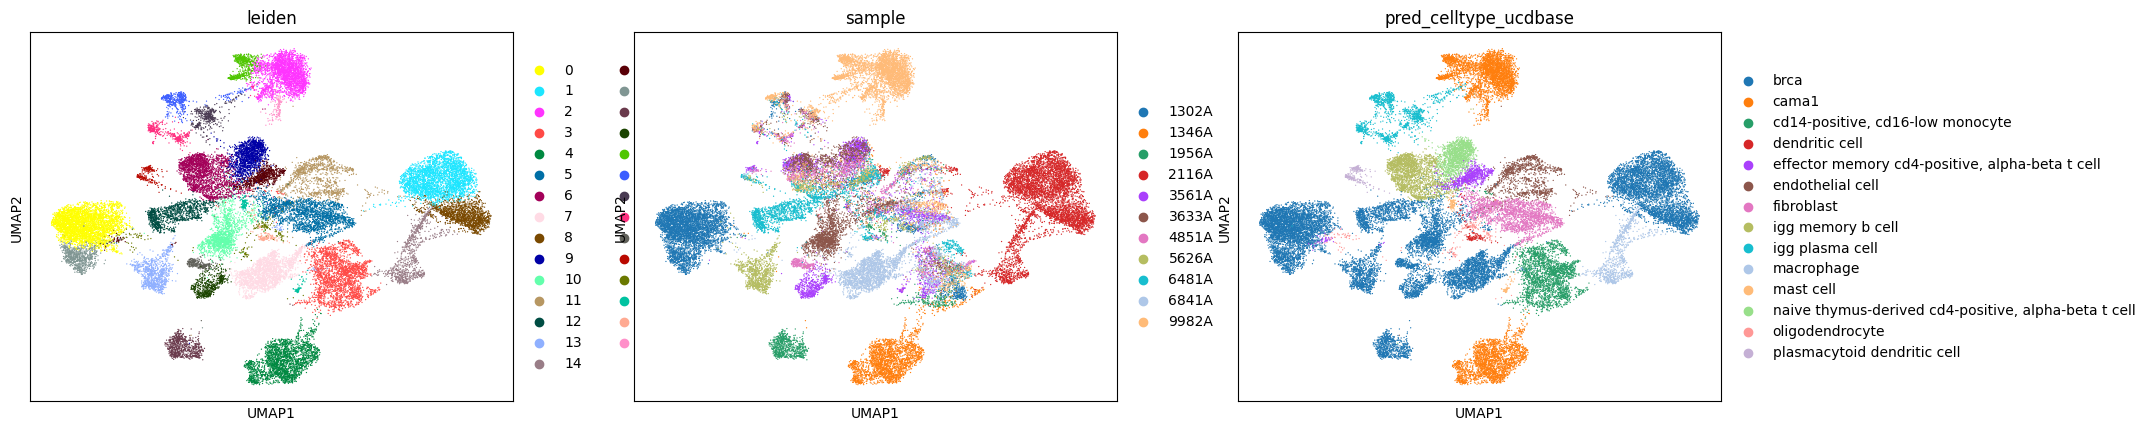

In [22]:
sc.pl.umap(adata_all, color=['leiden', "sample","pred_celltype_ucdbase"])

In [37]:
df = adata_all.obs[["sample","batch","leiden","pred_celltype_ucdbase"]]

In [38]:
df.to_csv("/QRISdata/Q1851/Andrew_C/Pfizer/UniCellDeconvolution_scRNA.csv")

In [40]:
ucd.tl.base(samples["6841A"])

2023-12-14 14:56:58,982|[UCD]|INFO: Starting UCDeconvolveBASE Run. | Timer Started.
Preprocessing Dataset | 100% (12 of 12) || Elapsed Time: 0:00:01 Time:  0:00:01
2023-12-14 14:57:05,460|[UCD]|INFO: Uploading Data | Timer Started.
2023-12-14 14:57:08,177|[UCD]|INFO: Upload Complete | Elapsed Time: 2.716 (s)
Waiting For Submission : RUNNING | Queue Size : 1 | | |#| 3 Elapsed Time: 0:00:06
Waiting For Completion | 100% (2929 of 2929) || Elapsed Time: 0:00:31 Time:  0:00:31
2023-12-14 14:57:49,345|[UCD]|INFO: Download Results | Timer Started.
2023-12-14 14:57:51,366|[UCD]|INFO: Download Complete | Elapsed Time: 2.02 (s)
2023-12-14 14:57:52,282|[UCD]|INFO: Run Complete | Elapsed Time: 53.3 (s)


In [43]:
sc.pp.highly_variable_genes(samples["6841A"], min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(samples["6841A"], svd_solver='arpack')

sc.pp.neighbors(samples["6841A"], n_neighbors=10, n_pcs=40)
sc.tl.umap(samples["6841A"])
sc.tl.leiden(samples["6841A"] )

In [44]:
ucd.utils.assign_top_celltypes(samples["6841A"], category = "raw", groupby = "leiden")


/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


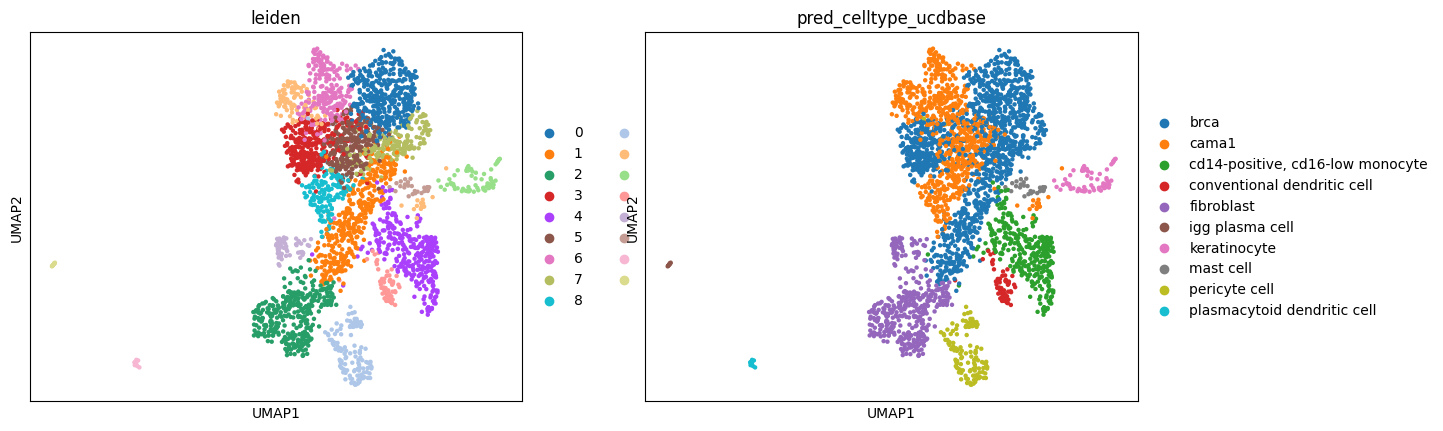

In [45]:
sc.pl.umap(samples["6841A"], color=['leiden',"pred_celltype_ucdbase"])

In [55]:
brain = samples["1346A"].concatenate(samples["1956A"])

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [56]:
ucd.tl.base(brain)

2023-12-14 15:08:03,026|[UCD]|INFO: Starting UCDeconvolveBASE Run. | Timer Started.
Preprocessing Dataset | 100% (15 of 15) || Elapsed Time: 0:00:01 Time:  0:00:01
2023-12-14 15:08:07,017|[UCD]|INFO: Uploading Data | Timer Started.
2023-12-14 15:08:10,518|[UCD]|INFO: Upload Complete | Elapsed Time: 3.5 (s)
Waiting For Submission : RUNNING | Queue Size : 1 | | |#| 1 Elapsed Time: 0:00:02
Waiting For Completion | 100% (3694 of 3694) || Elapsed Time: 0:00:38 Time:  0:00:38
2023-12-14 15:08:53,768|[UCD]|INFO: Download Results | Timer Started.
2023-12-14 15:08:56,277|[UCD]|INFO: Download Complete | Elapsed Time: 2.509 (s)
2023-12-14 15:08:57,855|[UCD]|INFO: Run Complete | Elapsed Time: 54.829 (s)


In [57]:
sc.pp.highly_variable_genes(brain, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(brain, svd_solver='arpack')

sc.pp.neighbors(brain, n_neighbors=10, n_pcs=40)
sc.tl.umap(brain)
sc.tl.leiden(brain)

In [58]:
ucd.utils.assign_top_celltypes(brain, category = "raw", groupby = "leiden")

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


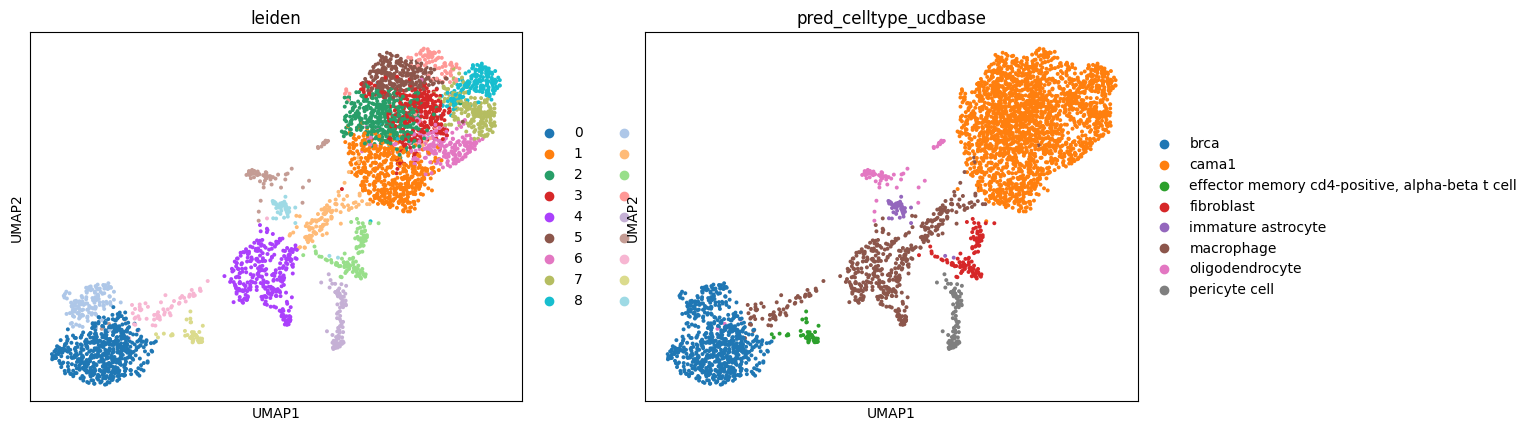

In [59]:
sc.pl.umap(brain, color=['leiden',"pred_celltype_ucdbase"])

In [135]:
df = brain.obs[["sample","batch","leiden","pred_celltype_ucdbase"]]
df.to_csv("/QRISdata/Q1851/Andrew_C/Pfizer/brain_UniCellDeconvolution_scRNA.csv")

In [77]:
lymph = samples["1302A"].concatenate([samples["2116A"],samples["3561A"],samples["3633A"],samples["4851A"],samples["5626A"],samples["6481A"],samples["9982A"]])

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [79]:
ucd.tl.base(lymph)

2023-12-14 15:18:51,102|[UCD]|INFO: Starting UCDeconvolveBASE Run. | Timer Started.
Preprocessing Dataset | 100% (110 of 110) || Elapsed Time: 0:00:14 Time:  0:00:14
2023-12-14 15:19:07,802|[UCD]|INFO: Uploading Data | Timer Started.
2023-12-14 15:19:18,445|[UCD]|INFO: Upload Complete | Elapsed Time: 10.642 (s)
Waiting For Submission : RUNNING | Queue Size : 1 | | |#| 1 Elapsed Time: 0:00:02
Waiting For Completion | 100% (28002 of 28002) || Elapsed Time: 0:03:36 Time:  0:03:36
2023-12-14 15:23:00,477|[UCD]|INFO: Download Results | Timer Started.
2023-12-14 15:23:10,297|[UCD]|INFO: Download Complete | Elapsed Time: 9.819 (s)
2023-12-14 15:23:11,256|[UCD]|INFO: Run Complete | Elapsed Time: 260.153 (s)


In [80]:
sc.pp.highly_variable_genes(lymph, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(lymph, svd_solver='arpack')

sc.pp.neighbors(lymph, n_neighbors=10, n_pcs=40)
sc.tl.umap(lymph)
sc.tl.leiden(lymph)

In [81]:
ucd.utils.assign_top_celltypes(lymph, category = "raw", groupby = "leiden")

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


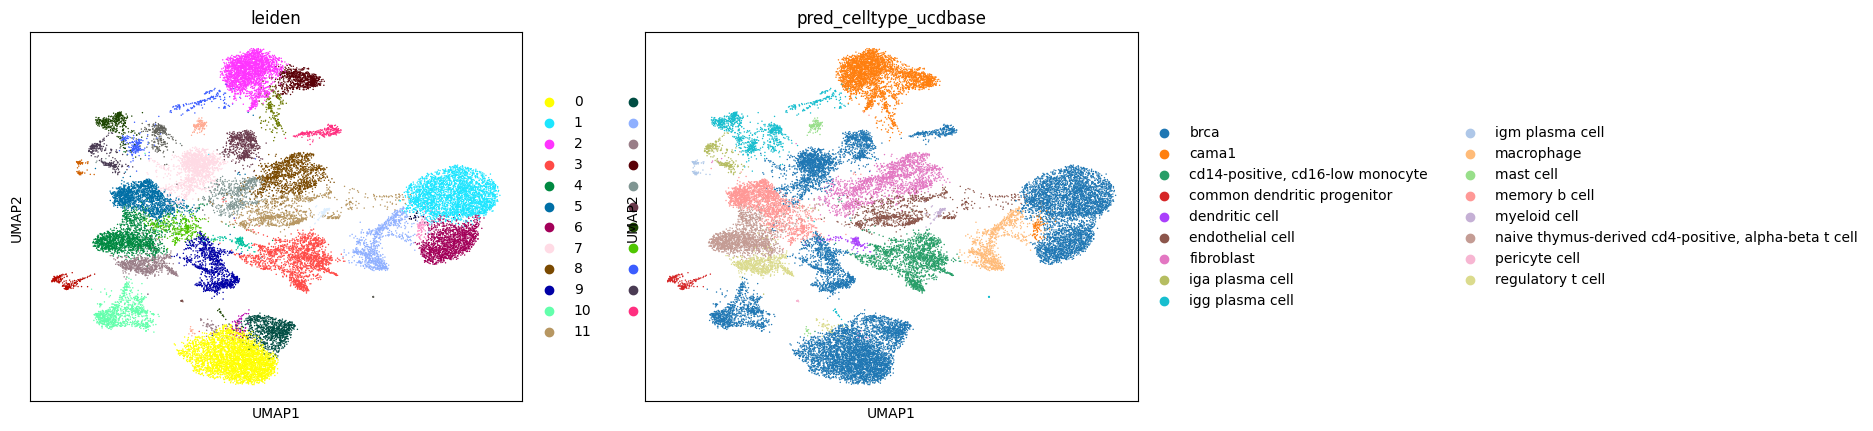

In [82]:
sc.pl.umap(lymph, color=['leiden',"pred_celltype_ucdbase"])